# Polynomial Regression

In the **Linear Regression** notebook, we saw how to model relationships where the target variable depends linearly on the input features. But what if the relationship is **non-linear**? Does that mean we need an entirely different type of model?

Surprisingly, no. We can still use linear regression to model non-linear relationships, by transforming the input features.


Imagine you're trying to predict the price of a house based on the size of its plot. If the plot is rectangular and your dataset includes only the **length** and **width**, there's no single feature that directly tells you the area. But since the **area = length $\cdot$ width**, we could manually create a new feature called `area`.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
n = 200
length = np.random.uniform(10, 50, size=n)
width = np.random.uniform(10, 50, size=n)

area = length * width

noise = np.random.normal(0, 200, size=n)
price = area + noise

# Combine / Reshape features
X = np.column_stack((length, width))
X_area = area.reshape((-1,1))

# Create Train Test split
X_train, X_test, X_area_train, X_area_test, y_train, y_test = train_test_split(X, X_area, price)

# Train models
model_basic = LinearRegression().fit(X_train, y_train)
model_area = LinearRegression().fit(X_area_train, y_train)

# Predictions
price_pred_basic = model_basic.predict(X_test)
price_pred_area = model_area.predict(X_area_test)

# Evaluation
mse_basic = mean_squared_error(y_test, price_pred_basic)
mse_area = mean_squared_error(y_test, price_pred_area)

print(f"Mean Squared Error (basic): {mse_basic:.2f}")
print(f"Mean Squared Error (area): {mse_area:.2f}")

Mean Squared Error (no area): 58743.90
Mean Squared Error (area): 37715.60


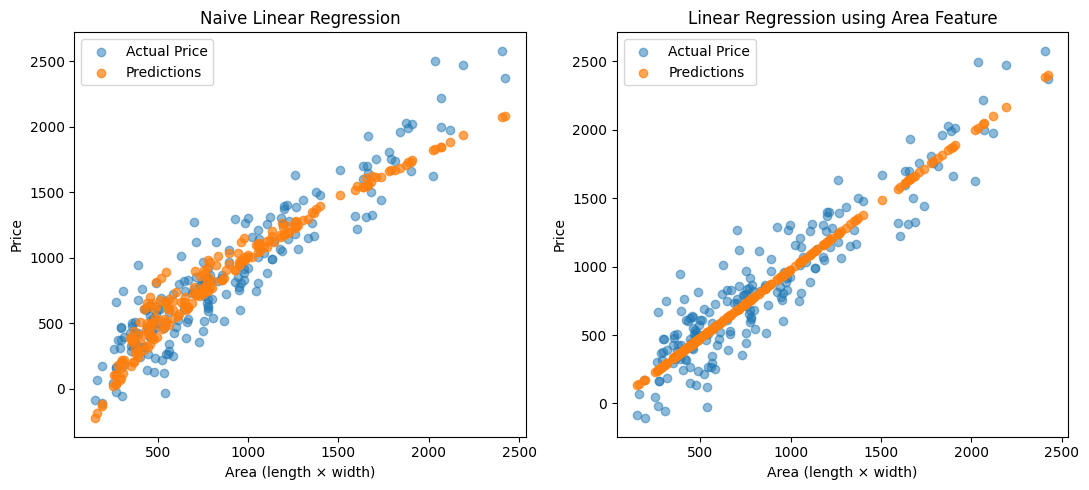

In [24]:
fig = plt.figure(figsize=(11, 5))

# Plot actual price vs predicted (without area)
def plot_model(predictions, title):
    plt.scatter(area, price, alpha=0.5, label="Actual Price")
    plt.scatter(area, predictions, alpha=0.7, label="Predictions")
    plt.title(title)
    plt.xlabel("Area (length × width)")
    plt.ylabel("Price")
    plt.legend()

plt.subplot(1, 2, 1)
plot_model(model_basic.predict(X), "Naive Linear Regression")

plt.subplot(1, 2, 2)
plot_model(model_area.predict(X_area), "Linear Regression using Area Feature")
# Plot actual price vs predicted (with area)

plt.tight_layout()
plt.show()

### Polynomial Feature Expansion
This idea can be generalized. Instead of manually adding one or two non-linear features, we can automatically expand our feature set using **polynomials**.

Suppose your original input features are: $x_1$, $x_2$

If we expand them to **degree 2**, we generate the following new feature set: $x_1$, $x_1^2$, $x_2$, $x_2^2$ and $x_1 \cdot x_2$

Now, we can still apply a linear model on this expanded feature space. This allows the model to capture non-linear patterns in the data while retaining the simplicity of linear regression.

This process can be does through sklearn's `PolynomialFeatures` class.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Add Polynomial Features
feat = PolynomialFeatures(degree=2)
X_poly = feat.fit_transform(X)
X_poly_train = feat.fit_transform(X_train)
X_poly_test = feat.fit_transform(X_test)

# Train models
model_poly = LinearRegression().fit(X_poly_train, y_train)

# Predictions
price_pred_poly = model_poly.predict(X_poly_test)

# Evaluation
mse_basic = mean_squared_error(y_test, price_pred_poly)

print(f"Mean Squared Error (basic): {mse_basic:.2f}")
print(f"Mean Squared Error (area): {mse_area:.2f}")
print(f"Mean Squared Error (polynomial d=2): {mse_area:.2f}")

Mean Squared Error (basic): 39010.92
Mean Squared Error (area): 37715.60
Mean Squared Error (polynomial d=2): 37715.60


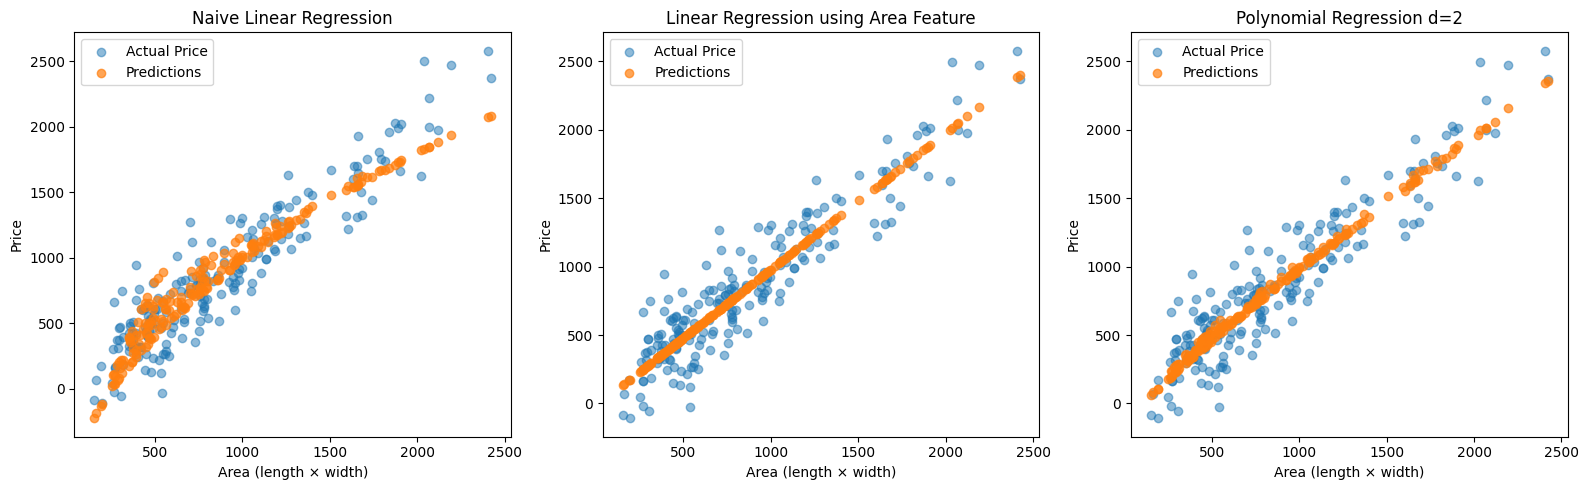

In [23]:
fig = plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plot_model(model_basic.predict(X), "Naive Linear Regression")

plt.subplot(1, 3, 2)
plot_model(model_area.predict(X_area), "Linear Regression using Area Feature")

plt.subplot(1, 3, 3)
plot_model(model_poly.predict(X_poly), "Polynomial Regression d=2")
# Plot actual price vs predicted (with area)

plt.tight_layout()
plt.show()

You'll notice that the best fit in our earlier example is achieved using the hand-crafted area feature. However, in real-world scenarios, it's rarely that straightforward to identify and extract the most relevant features manually.

This is where polynomial feature expansion becomes useful. By automatically generating combinations of the original input features—up to a certain degree, we allow the model to capture complex, non-linear relationships in the data without having to engineer features by hand.

--- 

### The Issue of Overfitting
But there's a trade-off.

It's not as simple as increasing the polynomial degree indefinitely. Adding too many polynomial features can lead to a model that fits the training data too well, capturing noise instead of the underlying pattern. This phenomenon is known as overfitting, and it can hurt the model’s ability to generalize to new, unseen data.

We'll explore this trade-off in more detail in the next example.

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


# True function
def f(x):
    return 4*x**2 + 12*x + 36


# Generate data
x_range = (-3, 3)
num_samples = 150

X = np.linspace(*x_range, num_samples).reshape(-1, 1)
y = f(X) + np.random.normal(scale=6, size=X.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y)

# Prediction range
x_pred_range = np.linspace(*x_range, 1000).reshape(-1, 1)



preds = []
test_mse = []
train_mse = []
# Fit and plot models
num_degrees = 35
for deg in range(num_degrees):
    model = make_pipeline(
        #StandardScaler(),
        PolynomialFeatures(degree=deg),
        LinearRegression(),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(x_pred_range)
    preds.append(y_pred)
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))



MSE (deg=1): 202.4448
MSE (deg=3): 41.6380
MSE (deg=30): 77.0478


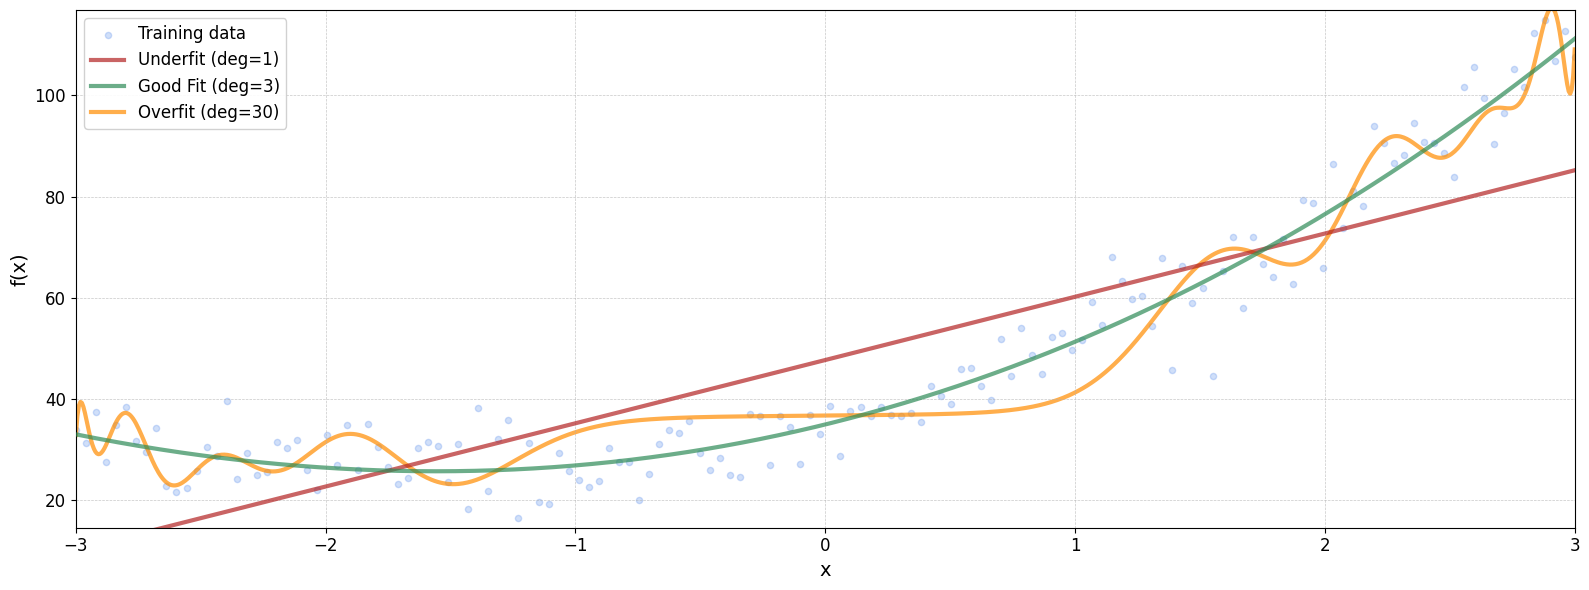

In [83]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(16, 6))

# Scatter: original data
plt.scatter(
    X, y,
    color='cornflowerblue',
    alpha=0.3,
    s=20,
    label="Training data"
)

# Degrees to demonstrate
degrees = [1, 3, 30]
colors = ['firebrick', 'seagreen', 'darkorange']
labels = [
    f'Underfit (deg={degrees[0]})',
    f'Good Fit (deg={degrees[1]})',
    f'Overfit (deg={degrees[2]})'
]
zorders = [2, 3, 1]  # Good fit on top

# Plot fitted curves
for deg, color, label, zorder in zip(degrees, colors, labels, zorders):
    plt.plot(
        x_pred_range, preds[deg],
        color=color,
        label=label,
        linewidth=3,
        zorder=zorder, alpha=0.7
    )
    print(f"MSE (deg={deg}): {test_mse[deg]:.4f}")

# Formatting
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.ylim(min(y) - 2, max(y) + 2)
plt.xlim(min(X), max(X))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, loc='upper left', frameon=True, framealpha=0.9)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.show()


A polynomial of degree 30 may fit the **training data exceptionally well**, capturing even the smallest fluctuations. However, this often comes at the cost of **generalization**—the model performs poorly on new, unseen data.

While the **training error decreases** as the model becomes more complex, the **test error eventually increases**, signaling **overfitting**. One way to mitigate this is by increasing the size of the training dataset, which can help the model learn a more robust pattern. Unfortunately, collecting more data isn't always practical.

### Bias vs. Variance

When building machine learning models, we often face a trade-off between **bias** and **variance**—two sources of error that affect a model’s performance.

- **Bias** refers to error due to overly simplistic assumptions in the model. A high-bias model may **underfit** the data, missing important patterns and producing poor performance on both the training and test sets.

- **Variance** refers to error due to the model being too sensitive to the training data. A high-variance model may **overfit**, capturing noise as if it were signal, and performing well on the training data but poorly on new, unseen data.

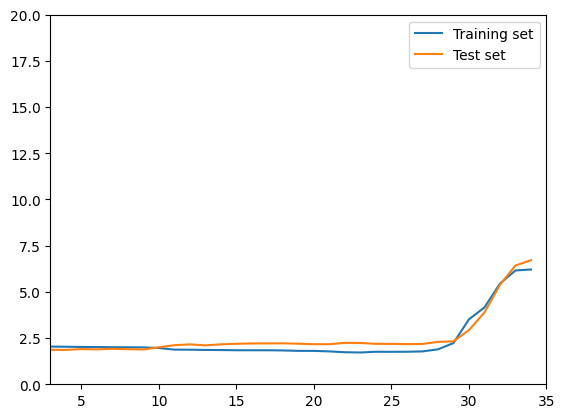

In [50]:
plt.plot(range(num_degrees),train_mse, label="Training set")
plt.plot( range(num_degrees), test_mse, label="Test set")
plt.ylim((0,20))
plt.xlim((3,num_degrees))
plt.legend()

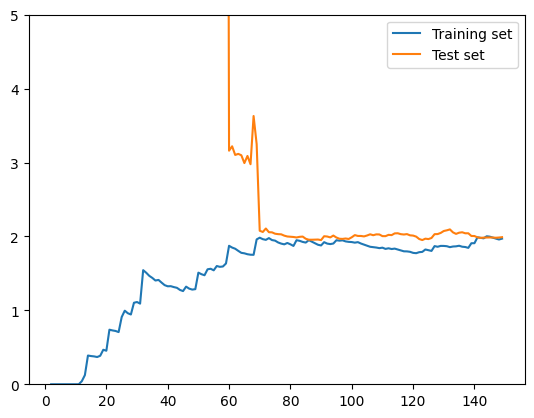

In [51]:
test_mse = []
train_mse = []
dataset_sizes = range(2, X_train.shape[0])
for i in dataset_sizes:
    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=10),
        LinearRegression(),
    )
    model.fit(X_train[:i], y_train[:i])
    y_pred = model.predict(x_pred_range)
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))
    train_mse.append(mean_squared_error(y_train[:i], model.predict(X_train[:i])))

plt.plot(dataset_sizes,train_mse, label="Training set")
plt.plot(dataset_sizes, test_mse, label="Test set")
plt.ylim((0,5))
#plt.xlim((3,num_degrees))
plt.legend()